In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [21]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [46]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [47]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [23]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

avarua ck
la asuncion ve
punta arenas cl
hermanus za
khatanga ru
denpasar id
pedernales ec
waipawa nz
faanui pf
abu samrah qa
jamestown sh
cidreira br
mataura pf
belushya guba ru
palestine us
kaitangata nz
bilma ne
vanavara ru
grindavik is
tsihombe mg
jamestown sh
taolanaro mg
dikson ru
carnarvon au
saint-philippe re
saint george bm
halifax ca
saldanha za
nakhon si thammarat th
hobart au
surt ly
kristinehamn se
souillac mu
urumqi cn
ushuaia ar
odweyne so
ushuaia ar
ballina au
coahuayana mx
albany au
barguzin ru
acapulco mx
yumen cn
digboi in
longyearbyen sj
cidreira br
hermiston us
saint-philippe re
yining cn
nikolskoye ru
busselton au
yellowknife ca
rikitea pf
carnarvon au
ushuaia ar
klaksvik fo
barrow us
iqaluit ca
harboore dk
half moon bay us
rikitea pf
albany au
rikitea pf
atuona pf
cape town za
georgetown sh
caluquembe ao
mount gambier au
mazatlan mx
ust-kamchatsk ru
dingle ie
cap malheureux mu
chlorakas cy
bluff nz
tura ru
busselton au
punta arenas cl
jesus carranza mx
rikitea pf

cape town za
marcona pe
te anau nz
airai pw
grand river south east mu
rikitea pf
tokur ru
ushuaia ar
mataura pf
lompoc us
tsihombe mg
bluff nz
nanortalik gl
cape town za
rikitea pf
cape town za
busselton au
belushya guba ru
moron mn
oum hadjer td
poitiers fr
butaritari ki
jamestown sh
esperance au
skagastrond is
punta arenas cl
barrow us
kodiak us
dikson ru
bredasdorp za
busselton au
klaksvik fo
plettenberg bay za
saskylakh ru
taolanaro mg
boueni yt
bluff nz
hithadhoo mv
tuatapere nz
ushuaia ar
timbo br
ushuaia ar
albany au
minbu mm
axim gh
new norfolk au
bhimunipatnam in
new norfolk au
tautira pf
aguimes es
kousseri cm
juifang tw
saskylakh ru
amderma ru
busselton au
lang son vn
rikitea pf
pangoa pe
bengkulu id
clyde river ca
punta arenas cl
oga jp
puerto ayora ec
aklavik ca
hovd mn
kapiri mposhi zm
russell nz
sorong id
ushuaia ar
mahebourg mu
avarua ck
college us
east london za
rikitea pf
saint pete beach us
udachnyy ru
comodoro rivadavia ar
shetpe kz
hobart au
plettenberg bay za
kavi

cape town za
yakeshi cn
ixtapa mx
praia da vitoria pt
comodoro rivadavia ar
lompoc us
punta arenas cl
aklavik ca
portel br
arraial do cabo br
busselton au
souillac mu
rikitea pf
kangaatsiaq gl
sitka us
iqaluit ca
hermanus za
whitianga nz
barrow us
ushuaia ar
tselinnoye ru
barentsburg sj
mys shmidta ru
vaini to
marzuq ly
vardo no
port elizabeth za
victoria sc
fernley us
rawannawi ki
phan rang vn
atambua id
hilo us
ushuaia ar
ushuaia ar
port alfred za
hot springs us
albany au
san pedro bo
antalaha mg
bredasdorp za
teya ru
albany au
kavaratti in
hobart au
puerto ayora ec
harrisonburg us
tuatapere nz
jubayl lb
rikitea pf
new norfolk au
cairns au
kapaa us
saint george bm
punta arenas cl
hamilton us
vaini to
kapaa us
shetpe kz
mahebourg mu
zalantun cn
seydi tm
norman wells ca
cervo es
avarua ck
mataura pf
belushya guba ru
ushuaia ar
fort nelson ca
lorengau pg
ushuaia ar
avarua ck
carndonagh ie
gat ly
notse tg
avarua ck
ushuaia ar
punta arenas cl
rikitea pf
tiksi ru
mayya ru
mataura pf
mahebo

In [24]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | ust-nera
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | benghazi
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | flagstaff
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | bulgan
Processing Record 14 of Set 1 | khandyga
Processing Record 15 of Set 1 | gravelbourg
Processing Record 16 of Set 1 | ilhabela
Processing Record 17 of Set 1 | sioux lookout
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | kuantan
Processing Record 21 of Set 1 | ekibastuz
Processing Record 22 of Set 1 | namibe
Proce

City not found. Skipping...
Processing Record 38 of Set 4 | ishigaki
Processing Record 39 of Set 4 | ambodifototra
City not found. Skipping...
Processing Record 40 of Set 4 | marcona
City not found. Skipping...
Processing Record 41 of Set 4 | la ronge
Processing Record 42 of Set 4 | makokou
Processing Record 43 of Set 4 | saleaula
City not found. Skipping...
Processing Record 44 of Set 4 | coahuayana
Processing Record 45 of Set 4 | ostrovnoy
Processing Record 46 of Set 4 | san patricio
Processing Record 47 of Set 4 | nelson bay
Processing Record 48 of Set 4 | moscow
Processing Record 49 of Set 4 | turan
Processing Record 50 of Set 4 | dikson
Processing Record 1 of Set 5 | havoysund
Processing Record 2 of Set 5 | hobart
Processing Record 3 of Set 5 | mount isa
Processing Record 4 of Set 5 | tahoua
Processing Record 5 of Set 5 | yulara
Processing Record 6 of Set 5 | mawlaik
Processing Record 7 of Set 5 | luderitz
Processing Record 8 of Set 5 | kupino
Processing Record 9 of Set 5 | brenes

Processing Record 26 of Set 8 | tshikapa
Processing Record 27 of Set 8 | bardiyah
Processing Record 28 of Set 8 | clyde river
Processing Record 29 of Set 8 | satitoa
City not found. Skipping...
Processing Record 30 of Set 8 | yelovo
Processing Record 31 of Set 8 | isla mujeres
Processing Record 32 of Set 8 | urubamba
Processing Record 33 of Set 8 | chivilcoy
Processing Record 34 of Set 8 | huarmey
Processing Record 35 of Set 8 | ridgecrest
Processing Record 36 of Set 8 | cabo san lucas
Processing Record 37 of Set 8 | fort nelson
Processing Record 38 of Set 8 | carlos antonio lopez
Processing Record 39 of Set 8 | dongfeng
Processing Record 40 of Set 8 | paita
Processing Record 41 of Set 8 | matay
Processing Record 42 of Set 8 | olafsvik
Processing Record 43 of Set 8 | harboore
Processing Record 44 of Set 8 | kloulklubed
Processing Record 45 of Set 8 | inhambane
Processing Record 46 of Set 8 | lethem
Processing Record 47 of Set 8 | banda aceh
Processing Record 48 of Set 8 | ahuimanu
Proc

Processing Record 11 of Set 12 | latung
Processing Record 12 of Set 12 | byadgi
Processing Record 13 of Set 12 | bonthe
Processing Record 14 of Set 12 | imbituba
Processing Record 15 of Set 12 | youghal
Processing Record 16 of Set 12 | poso
Processing Record 17 of Set 12 | goderich
Processing Record 18 of Set 12 | mfou
Processing Record 19 of Set 12 | marsh harbour
Processing Record 20 of Set 12 | senno
Processing Record 21 of Set 12 | big rapids
Processing Record 22 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 23 of Set 12 | chingirlau
Processing Record 24 of Set 12 | bargal
City not found. Skipping...
Processing Record 25 of Set 12 | ginir
Processing Record 26 of Set 12 | durango
Processing Record 27 of Set 12 | paramonga
Processing Record 28 of Set 12 | knysna
Processing Record 29 of Set 12 | saryozek
Processing Record 30 of Set 12 | leningradskiy
Processing Record 31 of Set 12 | yamada
Processing Record 32 of Set 12 | turukhansk
Processing Record 33 of 

In [48]:
city_data

[{'City': 'Hermanus',
  'Lat': -34.4187,
  'Lng': 19.2345,
  'Max Temp': 43.9,
  'Humidity': 68,
  'Cloudiness': 39,
  'Wind Speed': 14,
  'Country': 'ZA',
  'Date': '2021-07-22 02:04:28'},
 {'City': 'Mataura',
  'Lat': -46.1927,
  'Lng': 168.8643,
  'Max Temp': 49.48,
  'Humidity': 85,
  'Cloudiness': 92,
  'Wind Speed': 3.29,
  'Country': 'NZ',
  'Date': '2021-07-22 02:04:29'},
 {'City': 'Ust-Nera',
  'Lat': 64.5667,
  'Lng': 143.2,
  'Max Temp': 60.46,
  'Humidity': 95,
  'Cloudiness': 100,
  'Wind Speed': 6.04,
  'Country': 'RU',
  'Date': '2021-07-22 02:04:29'},
 {'City': 'Rikitea',
  'Lat': -23.1203,
  'Lng': -134.9692,
  'Max Temp': 72.82,
  'Humidity': 63,
  'Cloudiness': 1,
  'Wind Speed': 14.65,
  'Country': 'PF',
  'Date': '2021-07-22 02:04:30'},
 {'City': 'Benghazi',
  'Lat': 32.1167,
  'Lng': 20.0667,
  'Max Temp': 79.27,
  'Humidity': 72,
  'Cloudiness': 3,
  'Wind Speed': 13.69,
  'Country': 'LY',
  'Date': '2021-07-22 02:04:30'},
 {'City': 'Bredasdorp',
  'Lat': -34.532

In [40]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,43.90,68,39,14.00,ZA,2021-07-22 02:04:28
1,Mataura,-46.1927,168.8643,49.48,85,92,3.29,NZ,2021-07-22 02:04:29
2,Ust-Nera,64.5667,143.2000,60.46,95,100,6.04,RU,2021-07-22 02:04:29
3,Rikitea,-23.1203,-134.9692,72.82,63,1,14.65,PF,2021-07-22 02:04:30
4,Benghazi,32.1167,20.0667,79.27,72,3,13.69,LY,2021-07-22 02:04:30
...,...,...,...,...,...,...,...,...,...
566,Pistsovo,57.1790,40.5298,54.70,91,41,8.90,RU,2021-07-22 02:08:00
567,Whangamata,-37.2000,175.8667,60.49,85,60,10.33,NZ,2021-07-22 02:08:00
568,Acajutla,13.5928,-89.8275,83.12,76,18,5.93,SV,2021-07-22 02:08:01
569,Shache,38.4167,77.2406,70.32,51,86,3.51,CN,2021-07-22 02:08:01


In [49]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
print(city_data_df)

           City Country                 Date      Lat       Lng  Max Temp  \
0      Hermanus      ZA  2021-07-22 02:04:28 -34.4187   19.2345     43.90   
1       Mataura      NZ  2021-07-22 02:04:29 -46.1927  168.8643     49.48   
2      Ust-Nera      RU  2021-07-22 02:04:29  64.5667  143.2000     60.46   
3       Rikitea      PF  2021-07-22 02:04:30 -23.1203 -134.9692     72.82   
4      Benghazi      LY  2021-07-22 02:04:30  32.1167   20.0667     79.27   
..          ...     ...                  ...      ...       ...       ...   
566    Pistsovo      RU  2021-07-22 02:08:00  57.1790   40.5298     54.70   
567  Whangamata      NZ  2021-07-22 02:08:00 -37.2000  175.8667     60.49   
568    Acajutla      SV  2021-07-22 02:08:01  13.5928  -89.8275     83.12   
569      Shache      CN  2021-07-22 02:08:01  38.4167   77.2406     70.32   
570        Apac      UG  2021-07-22 02:08:02   1.9756   32.5386     66.06   

     Humidity  Cloudiness  Wind Speed  
0          68          39       14.

In [43]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [50]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

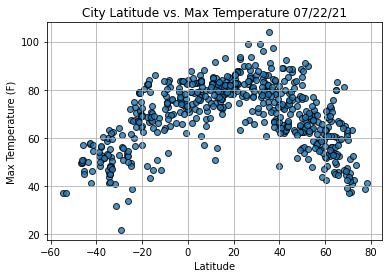

In [51]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

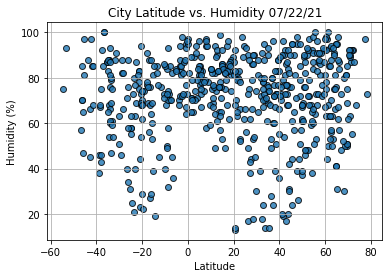

In [52]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

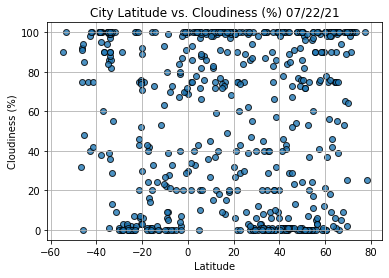

In [53]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

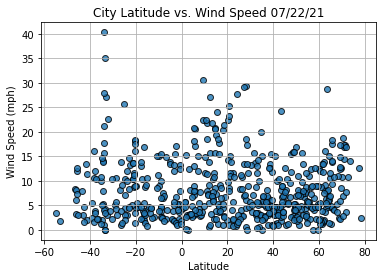

In [54]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()